In [84]:
import os, math, sys
import pandas as pd
import pandapower as pp
import numpy as np

from pandapower.file_io import from_json, to_json

main_dir = os.path.abspath(os.path.join(os.path.abspath(""), ".."))
data_dir = 'Modified_116_LV_CSV'

if main_dir not in sys.path:
    sys.path.insert(0, main_dir)

from create_basic_network import debug_result, hc_violation

In [85]:
net = from_json(os.path.join(main_dir, 'json_networks', 'no_load_network.json'))
net45 = from_json(os.path.join(main_dir, 'json_networks', '45_loads_network.json'))
net54 = from_json(os.path.join(main_dir, 'json_networks', '54_loads_network.json'))
net_far = from_json(os.path.join(main_dir, 'json_networks', 'farthest_load_network.json'))

print(hc_violation(net), hc_violation(net45), hc_violation(net54), hc_violation(net_far))

True True True True


In [86]:
pp.runpp_3ph(net, max_iteration=100, tolerance_mva=1e-8, calculate_voltage_angles=True)
pp.runpp_3ph(net45, max_iteration=100, tolerance_mva=1e-8, calculate_voltage_angles=True)
# pp.runpp_3ph(net54, max_iteration=100, tolerance_mva=1e-8, calculate_voltage_angles=True)
pp.runpp_3ph(net_far, max_iteration=100, tolerance_mva=1e-8, calculate_voltage_angles=True)

In [87]:
net.res_bus_3ph.loc[:, ['vm_a_pu', 'vm_b_pu', 'vm_c_pu', 'p_a_mw', 'p_b_mw', 'p_c_mw']].describe()

,vm_a_pu,vm_b_pu,vm_c_pu,p_a_mw,p_b_mw,p_c_mw
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,1.050466,1.050466,1.050466,-0.000031,-0.000031,-0.000031
std,0.000043,0.000043,0.000043,0.000340,0.000340,0.000340
min,1.050000,1.050000,1.050000,-0.003679,-0.003679,-0.003679
25%,1.050470,1.050470,1.050470,0.000000,0.000000,0.000000
50%,1.050470,1.050470,1.050470,0.000000,0.000000,0.000000
75%,1.050470,1.050470,1.050470,0.000000,0.000000,0.000000
max,1.050470,1.050470,1.050470,0.000000,0.000000,0.000000


In [88]:
net45.res_bus_3ph.loc[:, ['vm_a_pu', 'vm_b_pu', 'vm_c_pu', 'p_a_mw', 'p_b_mw', 'p_c_mw']].describe()

,vm_a_pu,vm_b_pu,vm_c_pu,p_a_mw,p_b_mw,p_c_mw
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,1.084410,0.933138,1.108701,-0.000029,-0.000044,-0.000027
std,0.004286,0.011271,0.006124,0.001836,0.001906,0.001625
min,1.050094,0.927625,1.049984,-0.019363,-0.020167,-0.017105
25%,1.082792,0.930058,1.107140,0.000000,0.000000,0.000000
50%,1.083679,0.931429,1.108461,0.000000,0.000000,0.000000
75%,1.086653,0.933766,1.110831,0.000000,0.000000,0.000000
max,1.094717,1.049922,1.118707,0.001000,0.001000,0.001000


In [89]:
net45.res_bus_3ph.loc[:, ['vm_a_pu', 'vm_b_pu', 'vm_c_pu', 'p_a_mw', 'p_b_mw', 'p_c_mw']].head(10)

,vm_a_pu,vm_b_pu,vm_c_pu,p_a_mw,p_b_mw,p_c_mw
0,1.050094,1.049922,1.049984,-0.019363,-0.020167,-0.017105
1,1.094717,0.943049,1.118707,0.000000,0.000000,0.000000
2,1.092064,0.940136,1.116544,0.000000,0.000000,0.000000
3,1.091771,0.940159,1.116591,0.000000,0.000000,0.000000
4,1.090781,0.938433,1.115257,0.000000,0.000000,0.000000
5,1.091638,0.940170,1.116613,0.001000,0.000000,0.000000
6,1.090851,0.938103,1.115280,0.000000,0.000000,0.000000
7,1.090888,0.937925,1.115292,0.000000,0.001000,0.000000
8,1.088533,0.936064,1.113066,0.000000,0.000000,0.000000
9,1.088122,0.936097,1.113133,0.000000,0.000000,0.000000


In [90]:
net45.res_bus_3ph.loc[:, ['p_a_mw', 'p_b_mw', 'p_c_mw']].sum()

p_a_mw   -0.003363
p_b_mw   -0.005167
p_c_mw   -0.003105
dtype: float64

In [91]:
net_far.res_bus_3ph.loc[:, ['vm_a_pu', 'vm_b_pu', 'vm_c_pu', 'p_a_mw', 'p_b_mw', 'p_c_mw']].describe()

,vm_a_pu,vm_b_pu,vm_c_pu,p_a_mw,p_b_mw,p_c_mw
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,1.013862,1.016637,1.123956,-0.000029,-0.000032,-0.000034
std,0.003448,0.003112,0.006898,0.000416,0.000349,0.000364
min,1.011682,1.016107,1.050020,-0.004384,-0.003775,-0.003935
25%,1.013167,1.016274,1.124438,0.000000,0.000000,0.000000
50%,1.013713,1.016325,1.124545,0.000000,0.000000,0.000000
75%,1.014050,1.016409,1.124718,0.000000,0.000000,0.000000
max,1.049993,1.049987,1.125066,0.001000,0.000000,0.000000


In [92]:
# net45.res_bus_3ph.to_csv(os.path.join(main_dir, '45_loads_res_bus_3ph.csv'), index=True)

Text(0.5, 1.0, 'Line Resistance')

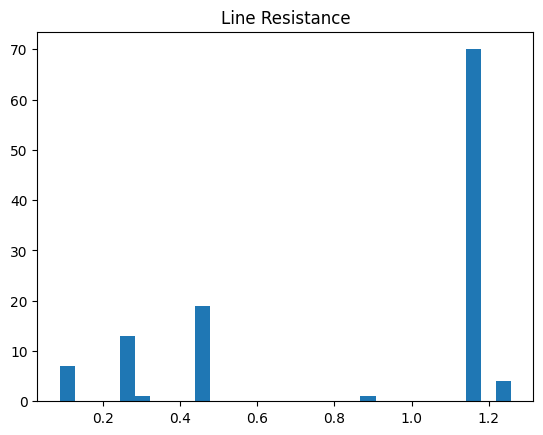

In [93]:
import matplotlib.pyplot as plt
plt.hist(net.line.r_ohm_per_km, bins=30); plt.title("Line Resistance")
